하나님이 자기 형상 곧 하나님의 형상대로 사람을 창조하시되 남자와 여자를 창조하시고 하나님이 그들에게 복을 주시며 하나님이 그들에게 이르시되 생육하고 번성하여 땅에 충만하라, 땅을 정복하라, 바다의 물고기와 하늘의 새와 땅에 움직이는 모든 생물을 다스리라 하시니라 (창1:27-28)

-------


<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/joyai/LectureNotes_ML.png?raw=true" width=1000></center>

__NOTE:__ The following materials have been compiled and adapted from the numerous sources including my own. Please help me to keep this tutorial up-to-date by reporting any issues or questions. Send any comments or criticisms to `idebtor@gmail.com` Your assistances and comments will be appreciated.

<b style="font-size:30px"> Chapter 5-3 로지스틱 손실함수(Logistic loss fucntion) </b>

    5.1 퍼셉트론  
    5.2 로지스틱 회귀와 시그모이드 함수    
    5.3 로지스틱 손실함수    
    5.4 이진 분류를 위한 데이터셋 준비    
    5.5 로지스틱 회귀 뉴론 만들기    
    5.6 로지스틱 회귀 뉴론으로 단일층 신경망 만들기    
    5.7 사이킷런의 로지스틱 회귀    


<b style="font-size:16px"> 로지스틱 회귀 중간 정리하기 </b>

로지스틱 회귀에 필요한 설명을 모두 마쳤습니다. 이제는 다음 그림을 보며 로지스틱 회귀를 정리합니다. 

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/joyai/ai4all-neuron8.png?raw=true" width=600></center>
<center> 그림 1: 로지스틱 회귀의 구조 </center>

__로지스틱 회귀는 이진 분류가 목표이므로 $-\infty$부터 $\infty$의 범위를 가지는 $z$의 값을 조절할 방법이 필요했습니다.__ 그래서 시그모이드 함수를 활성화 함수로 사용한 것입니다. 이는 시그모이드 함수를 통과하면 $z$를 확률처럼 해석할 수 있기 때문입니다. 그리고, 시그모이드 함수의 확률인 $a$를 0과 1로 구분하기 위하여 마지막에 임계 함수를 사용했습니다. 

그 결과 입력 데이터 $x$는 0과 1의 값으로 나누어졌습니다. 즉, 이진 분류가 되었습니다. 드디어 로지스틱 회귀가 '이진 분류'를 하기 위한 알고리즘인 진짜 이유를 알았습니다. 

이제 무엇이 남았습니까?   

아직 우리는 가중치와 편향을 적절하게 조정할 수 있는 방법을 배우지 않았습니다. 그렇다면 로지스틱 회귀에는 어떤 손실 함수를 사용해야 할까요? 선형 회귀에서 손실 함수로 제곱 오차를 사용했듯이 분류 문제에서도 __제곱 오차__ 를 사용할 수 있을까요? 

이제 로지스틱 회귀를 위한 손실 함수인 __로지스틱 손실 함수__ 에 대해 알아 보도록 합니다. 

# 로지스틱 손실 함수

선형 회귀는 정답과 예측 값의 오차 제곱이 최소가 되는 __가중치와 편향__ 을 찾는 것이 목표입니다.  
그렇다면, 로지스틱 회귀와 같은 분류의 목표는 무엇일까요? 

올바르게 분류된 샘플 데이터의 비율을 높이는 것이 분류의 목표입니다. 예를 들면, 사과, 배, 감을 분류하는 문제에서 사과, 배, 감으로 분류한 과일 중에서 제대로 분류한 비율을 높이는 것이 분류의 목표입니다. 하지만 안타깝게도 올바르게 분류된 샘플의 비율은 미분 가능한 함수가 아니기 때문에 경사 하강법의 손실 함수로 사용할 수 없습니다.  대신 비슷한 목표를 달성할 수 있는 다른 함수를 사용해야 하는데, 그 함수가 바로 __로지스틱 손실 함수__ 입니다. 

자 이제 이 로지스틱 함수를 알아봅시다. 
__로지스틱 손실 함수__ 는 다중 분류를 위한 손실 함수인 __크로스 엔트로피(cross entropy)손실 함수__ 를 이진 분류 버전으로 만든 것입니다. 크로스 엔트로피 손실 함수는 다중 분류를 다룰 때 공부합니다. 실무에서는 이중분류와 다중 분류를 분리하지 않고 모두 크로스 엔트로피 손실 함수라고 부르는 경우도 많습니다. 하지만 공부하는 입장에서는 둘을 구분하여 사용하기로 합니다. 

__로지스틱 손실 함수__ 는 다음과 같습니다. $a$는 활성화 함수가 출력한 값이고 $y$는 타깃(레이블)입니다. 

\begin{align}
L = - (y log(a) + (1-y) log(1-a))
\end{align}

위의 식을 어떻게 이해하면 좋을까요?

이진 분류는 그렇다(1), 아니다(0)라는 식으로 2개의 정답만 있습니다. 즉, 타깃의 값은 1 또는 0입니다. 따라서 위 식은 $y$가 1이거나 0인 경우로 정리됩니다. 

|                               |  $L$          |
|:-----------------------------:|:-------------:|
| $y$가 1인 경우(양성 클래스)   |    $-log(a)$   |  
| $y$가 0인 경우(음성 클래스)   |    $-log(1-a)$ |   


그런데, 앞 두 식의 값을 최소로 만들다 보면 $a$의 값이 우리가 원하는 목표치가 된다는 것을 알 수 있습니다. 

예를 들어, 양성 클래스인 경우 로지스틱 손실 함수의 값을 최소로 만들려면, $a$는 1에 자연스럽게 가까워집니다. 반대로 음성 클래스인 경우, 로지스틱 손실 함수의 값을 최소 만들면 $a$가 0에 가까워집니다.  이 값을 계단 함수에 통과시키면 올바르게 분류 작업이 수행됩니다. 

즉, 로지스틱 손실 함수를 최소화하면 $a$의 값이 우리가 가장 이상적으로 생각하는 값이 됩니다. 이제 로지스틱 손실 함수의 최솟값을 만드는 가중치와 편향을 찾기 위해 미분만 하면 될 것 같습니다. 

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/joyai/ai4all-LogisticLoss.png?raw=true" width=400></center>
<center> 그림 1: 로지스틱 손실 함수 </center>

<ipython-input-6-6a924d9ed098>:5: RuntimeWarning: invalid value encountered in log
  plt.plot(a, -np.log(a), label='-log(a), y = 1')
<ipython-input-6-6a924d9ed098>:6: RuntimeWarning: invalid value encountered in log
  plt.plot(a, -np.log(1 - a),label='-log(1 - a), y = 0')


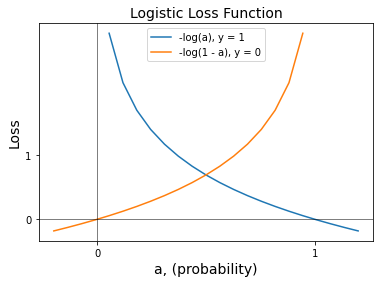

In [6]:
import numpy as np
import matplotlib.pylab as plt

a = np.linspace(-0.2, 1.2, 23)
plt.plot(a, -np.log(a), label='-log(a), y = 1')
plt.plot(a, -np.log(1 - a),label='-log(1 - a), y = 0')
plt.axvline(0, color='black', linewidth=0.5)
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel('a, (probability)', fontsize = 14)
plt.ylabel('Loss', fontsize = 14)
plt.yticks([0.0, 1.0])
plt.xticks([0.0, 1.0])
plt.title('Logistic Loss Function', fontsize = 14)
plt.legend()
plt.show()

## Another Closer Look

__로지스틱 손실함수__ 는 다음과 같이 조금 더 자세히 표현하기도 합니다. 

\begin{align}
L = -\frac{1}{m}\sum^{m}_{i=1}[y^{(i)} log(a^{(i)}) + (1-y^{(i)}) log(1-a^{(i)})]
\end{align}

- `m`은 전체 데이터의 개수입니다.
- $y^{(i)}$는 `i`번때 데이터의 class입니다. 
- $a^{(i)}$는 `i`번째 데이터의 log-odds값에 sigmoid를 취한 값입니다. 즉 `i`번째 데이터가 postive class에 속할 확률을 나타낸 값입니다. (0 <= $a^{(i)}$ <= 1) 


왜 위와 같은 공식이 유도되는 걸까요? 논리적으로 생각해 봅시다. 만약 i 번째 데이터의 class가 y=1 이라면 해당 데이터에 대한 loss는 다음과 같습니다.

\begin{align}
loss_{i(y=1)} = -log(a^{(i)})
\end{align}

$loss$를 최소화 시키려면 $a^{(i)}$ 값이 커야 합니다. 즉, 예측된 확률 값이 원래 class인 `1` 에 가까울수록 $loss$는 줄어들게 됩니다. 

이번에는 반대로 `i` 번째 데이터의 class가 `y=0` 인 경우를 생각해봅시다.

\begin{align}
loss_{i(y=0)} = -log(1 - a^{(i)})
\end{align}

$loss$를 최소화 시키려면  $a^{(i)}$ 값이 작아야 합니다. 즉, 예측된 확률 값이 원래 class이 `0`에 가까울수록 $loss$는 줄어들게 됩니다.

위의 그래프를 보면 올바르게 예측할수록 loss가 줄어드는 것을 볼 수 있습니다. 반대로 잘못 예측하게 되면 loss가 크게 증가하는데, 이는 모델이 잘못 예측할 때 패널티를 강하게 줌으로써 올바른 예측을 할 수 있도록 유도할 수 있습니다.

## 로지스틱 손실 함수 미분의 결과

가중치와 편향에 대한 로지스틱 손실 함수의 미분 결과는 다음과 같습니다. 이 식은 가중치와 편향을 조정하는데 사용할 것입니다. 

\begin{align}
\frac{\partial{}}{\partial{w_i}} L &= -(y - a) x_i  \\
\frac{\partial{}}{\partial{b}} L  &= -(y - a) 1
\end{align}

그런데 미분한 결과를 자세히 보면 $\hat{y}$이 $a$로 바뀌었을 뿐 제곱 오차를 미분한 결과와 동일합니다. 놀랍죠? 아래 표에서 왼쪽이 제곱 오차의 미분이고 오른쪽이 로지스틱 손실 함수의 미분입니다. 



|                     |  제곱 오차 손실 함수의 미분     |  로지스틱 손실 함수의 미분 | 
|:-------------------:|:----------------------------------------:|:--------------------------:|
| 가중치에 대한 미분  | $\frac{\partial{SE}}{\partial{w}}=-(y - \hat{y})x$ | $\frac{\partial{}}{\partial{w_i}} L = -(y - a) x_i$
| 편향에 대한 미분    | $\frac{\partial{SE}}{\partial{b}}=-(y - \hat{y})1 $| $\frac{\partial{}}{\partial{b}} L  = -(y - a) 1$


이 결과를 비추어보아 앞에서 우리가 구현한 Neuron 클래스와 크게 다르지 않을 것이라는 생각이 들 것입니다. 그러면, 이제 어떻게 이런 식이 유도되는지 살펴보도록 하겠습니다. 다음 과정이 좀 어렵다라도 기계학습과 딥러닝을 더 깊이 있게 이해하려면, 한번은 공부하고 넘어가는 것이 좋을 것입니다. 

로지스틱 손실 함수의 미분을 통해 로지스틱 손실 함수의 값을 최소로 하는 가중치와 편향을 찾아야 한다는 점을 꼭 기억해야 합니다. 그리고, 그 결과는 놀랍게도 제곱 오차 손실 함수의 미분과 거의 같다라는 것입니다. 

## 로지스틱 손실 함수 미분하기

### 로지스틱 손실 함수와 연쇄 법칙

미분에서는 합성 함수의 도함수(미분한 함수)를 구하기 위한 방법인 연쇄법칙(Chain rule)이 있습니다. 예를 들어, 다음과 같은 함수는 


\begin{align}
y = f(u), u = g(x)
\end{align}

아래와 같이 정리할 수 있는데, 
\begin{align}
y = f(g(x))
\end{align}

이때 $y$를 $x$에 대해 미분하는 방법은 $y$를 $u$에 대해 미분한 값과 $u$를 $x$에 대해 미분한 값을 곱하는 것입니다. 이것이 미분의 __연쇄 법칙__(Chain Rule)입니다. 

\begin{align}
\frac{\partial{y}}{\partial{x}} = \frac{\partial{y}}{\partial{u}} \frac{\partial{u}}{\partial{x}}
\end{align}

여기서 연쇄법칙을 설명한 이유는 로지스틱 손실 함수($L$)를 가중치($w$)나 편향($b$)에 대하여 바로 미분하면 너무 복잡하기 때문입니다. 

\begin{align}
\frac{\partial{L}}{\partial{w_i}} = ? \\
\frac{\partial{L}}{\partial{b}} = ? \\
\end{align}

그런데, 다음 그림을 살펴보면, 연쇄 법칙을 이용하면 위의 곤란한 문제를 해결할 수 있다는 힌트를 얻을 수 있습니다. 

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/joyai/ai4all-neuron9.png?raw=true" width=600></center>
<center> 그림 2: 로지스틱 손실 함수의 미분과 연쇄 법칙 </center>

그림을 보니 로지스틱 손실 함수($L$)를 활성화 함수의 출력값($a$)에 대하여 미분하고, 활성화 함수 출력값($a$)를 선형 함수의 출력값($z$)에 대하여 미분하고, 선형 함수의 출력값($z$)은 가중치($w$) 또는 편향($b$)에 대하여 미분한 다음 서로 곱하면 결국 우리가 원하는 로지스틱 손실 함수를 가중에 대하여 미분한 결과를 얻을 수 있습니다.  그리고, 이 과정은 그림의 오른쪽부터 왼쪽까지 역방향으로 진행된다는 것도 알 수 있습니다. 


\begin{align}
\frac{\partial{L}}{\partial{w_i}} = \frac{\partial{L}}{\partial{a}} \frac{\partial{a}}{\partial{z}}  \frac{\partial{z}}{\partial{w_i}}
\end{align}

### Step 1: 로지스틱 손실 함수를 $a$에 대하여 미분하기

그러면, 이제 각각의 도함수를 구하기만 하면 됩니다. 먼저 로지스틱 손실 함수를 $a$에 대하여 미분하겠습니다. 이때 $y$는 $a$의 함수가 아니므로 미분 기호 밖으로 뺄 수 있습니다. 

\begin{align}
\frac{\partial{L}}{\partial{a}} 
&= \frac{\partial{}}{\partial{a}} (-(ylog(a)+(1-y)log(1-a))) \\
&= -(y\frac{\partial{}}{\partial{a}} log(a)+(1-y) \frac{\partial{}}{\partial{a}} log(1-a))
\end{align}

$log(a)$을 $a$에 대하여 미분하면 $\frac{1}{a}$이므로 위 식은 다음과 같이 간단하게 정리됩니다. 

\begin{align}
\frac{\partial{L}}{\partial{a}} = -(y\frac{1}{a} - (1 - y) \frac{1}{1-a})
\end{align}


### Step 2:  $a$를 $z$에 대하여 미분하기

이제 $\frac{\partial{a}}{\partial{z}}$를 계산해 보겠습니다. 

여기에서 $a$는 시그모이드 함수이므로 $a$를 $z$에 대한 식으로 표현할 수 있습니다. $e^{-z}$를 $z$에 대하여 미분하면 $-e^{-z}$가 되므로 다음과 같이 미분할 수 있습니다. 


\begin{align}
\frac{\partial{a}}{\partial{z}} 
&= \frac{\partial{}}{\partial{z}}(\frac{1}{1 + e^{-z}}) \\
&= \frac{\partial{}}{\partial{z}}(1 + e^{-z})^{-1} \\
&= -(1 + e^{-z})^{-2} \frac{\partial{}}{\partial{z}} (e^{-z}) \\
&= -(1 + e^{-z})^{-2} (-e^{-z}) \\
&= \frac{e^{-z}}{ (1 + e^{-z})^2 } \\
\end{align}


마지막으로 얻은 식을 두 덩어리의 분수식으로 나눈 다음 공통 식을 묶어 정리하면 다음과 같이 됩니다. 

\begin{align}
\frac{\partial{a}}{\partial{z}} 
&= \frac{e^{-z}}{ (1 + e^{-z})^2 } \\
&= \frac{1}{1 + e^{-z}} \frac{e^{-z}}{ 1 + e^{-z} } \\
&= \frac{1}{1 + e^{-z}} (1 - \frac{1}{ 1 + e^{-z} }) \\
&= a ( 1 - a )
\end{align}

결국 $a$를 $z$에 대해 미분하면 다음과 같은 식이 됩니다. 

\begin{align}
\frac{\partial{a}}{\partial{z}} = a ( 1 - a )
\end{align}

### Step 3:  $z$를 $w$에 대하여 미분하기

마지막으로 $\frac{\partial{z}}{\partial{w_i}}$를 계산합니다. $z$는 선형 함수 $w_ix_i + b$이므로 $w_i$에 대해 미분하면 다른 항은 모두 사라지고 $x_i$만 남아   $\frac{\partial{z}}{\partial{w_i}} = x_i$가 됩니다. 

\begin{align}
\frac{\partial{z}}{\partial{w_i}} = x_i
\end{align}

### Step 4: 각 단계에서 구한 도함수 곱하기 

로지스틱 손실 함수를 $w$에 대하여 미분하기 위하여 연쇄법칙을 사용하여, 세 가지로 나무어 계산하였습니다. 이제 각 단계에서 구한 도함수를 곱하기만 하면 됩니다. 

\begin{align}
\frac{\partial{L}}{\partial{w_i}} 
&= \frac{\partial{L}}{\partial{a}} \frac{\partial{a}}{\partial{z}}  \frac{\partial{z}}{\partial{w_i}} \\
&= -(y\frac{1}{a} - (1 - y) \frac{1}{1-a}) a ( 1 - a )  x_i \\
&= -(y (1-a) - (1-y)a)  x_i  \\
&= -y(y-ya-a+ya)x_i  \\
&= -(y-a)x_i
\end{align}


결과를 보니, 놀랍게도, 로지스틱 손실 함수를 $w_i$에 대해 미분한 결과는 제곱 오차를 미분한 결과와 일치합니다. 

## 로지스틱 손실 함수의 미분 정리하고 역전파 이해하기

다음은 지금까지 살펴본 미분 과정을 그림으로 나타낸 것입니다. 

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/joyai/ai4all-neuron10.png?raw=true" width=600></center>
<center> 그림 3: 로지스틱 손실 함수의 미분 과정과 결과 </center>

오른쪽부터 살펴보면 로지스틱 손실 함수 $L$은 $a$에 대하여 미분하고, $a$는 $z$에 대하여 미분하고, $z$는 $w$에 대하여 미분합니다. 그리고 각 도함수의 곱을 가중치를 조정하는데 사용합니다. 이렇게 로지스틱 손실 함수에 대한 미분이 연쇄법칙에 의해 진행되는 구조를 보고 '그래디언트가 역전파된다'라고 말합니다.  

### 가중치 조정하는 방법 정리하기

로지스틱 회귀의 가중치를 조정하려면, 로지스틱 손실 함수를 가중치에 대해 미분한 식을 가중치에서 빼면 됩니다. 

\begin{align}
w_i &= w_i - \frac{\partial{L}}{\partial{w_i}} \\
    &= w_i + (y - a) x_i
\end{align}

### 편향 조정하는 방법 정리하기
로지스틱 손실 함수를 편향에 대하여 미분하는 방법도 연쇄 법칙을 적용하면 쉽게 구할 수 있습니다. 앞에서 이미 계산한 것처럼 그 결과를 적용하면 다음을 알 수 있습니다. 

\begin{align}
\frac{\partial{L}}{\partial{z}} 
&= \frac{\partial{L}}{\partial{a}} \frac{\partial{a}}{\partial{z}} \\
&= -(y-a)
\end{align}

따라서 다음과 같은 식이 성립됩니다. 

\begin{align}
\frac{\partial{L}}{\partial{b}} 
&= \frac{\partial{L}}{\partial{z}} \frac{\partial{z}}{\partial{b}} \\
&= -(y-a) \frac{\partial{}}{\partial{b}}(b + \sum_{i=1}^{n} w_ix_i)  \\
&= -(y-a)1
\end{align}

위에서, $z = b + \sum_{i=1}^n w_ix_i$ 를 적용하였고, 이 부분을 $b$에 대해 편미분할 경우, $w_ix_i$항들은 모두 $b$에 대해 상수이므로 0가 되고, b는 1이 됩니다. 

편향을 조정하는 것 역시 로지스틱 손실 함수를 편향에 대해 미분한 식을 편향에서 빼면 됩니다. 

\begin{align}
b &= b - \frac{\partial{L}}{\partial{b}} \\
  &= b + (y - a) 1
\end{align}

이제 가중치와 편향을 업데이트할 수 있는 방법을 모두 알았습니다. 이진 분류를 위한 클래스를 구현하는 것도 어렵지 않을 것입니다. 이제 본격적인 이진 분류를 위하여 분류용 데이터셋을 준비하겠습니다. 이번에 사용할 데이터셋은 위스콘신 유방암 데이터셋입니다. 

## 참고문헌

1. 케라스 창시자에게 배우는 딥러닝, 프랑소와 숄레, 길벗
1. 핸즈온 머신러닝, 오렐리앙 제롱, 한빛미디어
1. 딥러닝 입문, 박해선, 이지스 퍼블리싱
1. 파이썬으로 배우는 기계학습, 김영섭, K-MOOC
1. [로지스틱 회귀 개념 정리](https://eunsukimme.github.io/ml/2019/10/22/Logistic-Regression/)

-------
__Be joyful always!__ 1 Thes.5:16